In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# LIBRARIES

In [2]:
#impoting libraries

import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import xgboost
from sklearn.svm import SVC
from sklearn import ensemble 
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# DATASETS

In [3]:
#importing dataset (I/p & O/p)

tr_df = "/kaggle/input/titanic/train.csv"
train_df = pd.read_csv(tr_df)

ts_df = "/kaggle/input/titanic/test.csv"
test_df = pd.read_csv(ts_df)

# EDA 

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#basiv EDA 

def dataframe_operations(train_df):
    print(train_df.shape)
    print(train_df.head())
    print(train_df.info())
    print(train_df.describe())
    print(train_df.isnull().sum())

dataframe_operations(train_df)

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

As we can see we have missing values in three features (i.e; Age, Cabin, Embarked)

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#if theres any missing values in the dataset it will return the mean of the missing value each feature

feature_with_na = [features for features in train_df.columns if train_df[features].isnull().sum() > 1]
for feature in feature_with_na:
    print(feature, np.round(train_df[feature].isnull().mean(), 2 ), '% missing values') 

Age 0.2 % missing values
Cabin 0.77 % missing values
Embarked 0.0 % missing values


In [8]:
print(train_df['Age'].isnull().sum()/len(train_df['Age']))
print(train_df['Embarked'].isnull().sum()/len(train_df['Embarked']))

0.19865319865319866
0.002244668911335578


In [9]:
#checking basic stats for Age
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

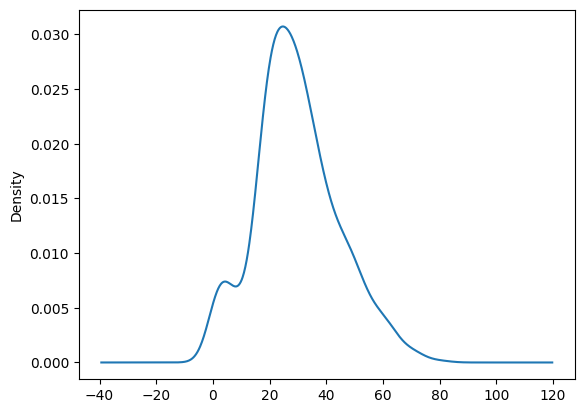

In [10]:
#plotting kde to check skewness of Age 
train_df['Age'].plot(kind = "kde")

<Axes: ylabel='Frequency'>

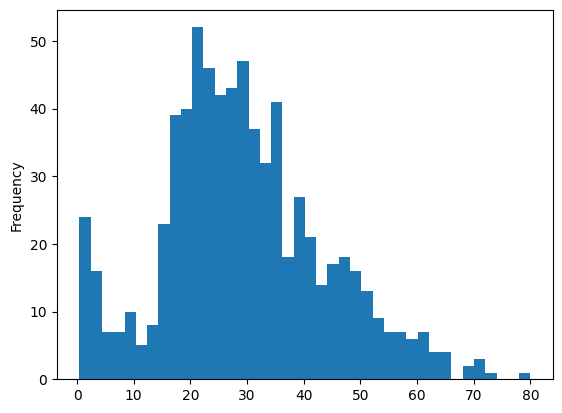

In [11]:
#plotting hist to check skewness of Age
train_df['Age'].plot(kind = "hist", bins = 40)

In [12]:
#skewness 
train_df['Age'].skew()

0.38910778230082704

<Axes: >

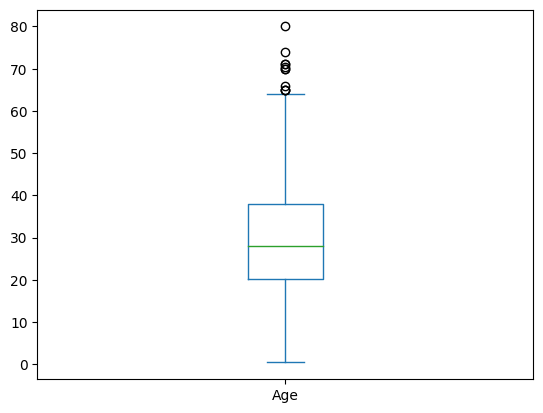

In [13]:
#boxplot to see outliers 
train_df['Age'].plot(kind = "box")

In [14]:
#are the outliers part of the data
train_df[train_df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [15]:
#checking basic stats for Embarked
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<Axes: ylabel='count'>

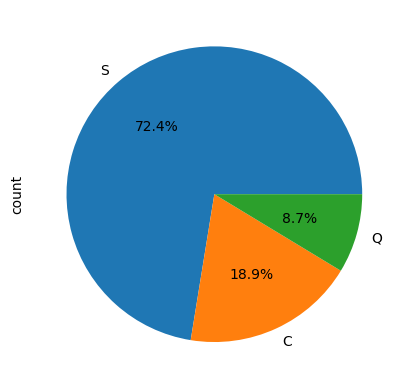

In [16]:
#piechart for Embarked (bc categorical)
train_df['Embarked'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

# FE

In [17]:
#filling missing values in Age and Embarked feature with median(bc it has outliers) and mode(bc it is categorical feature) respectively 

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [18]:
#droping three feature that are not usseful as for now

train_df = train_df.drop(columns=['Cabin', 'Name', 'Ticket'])

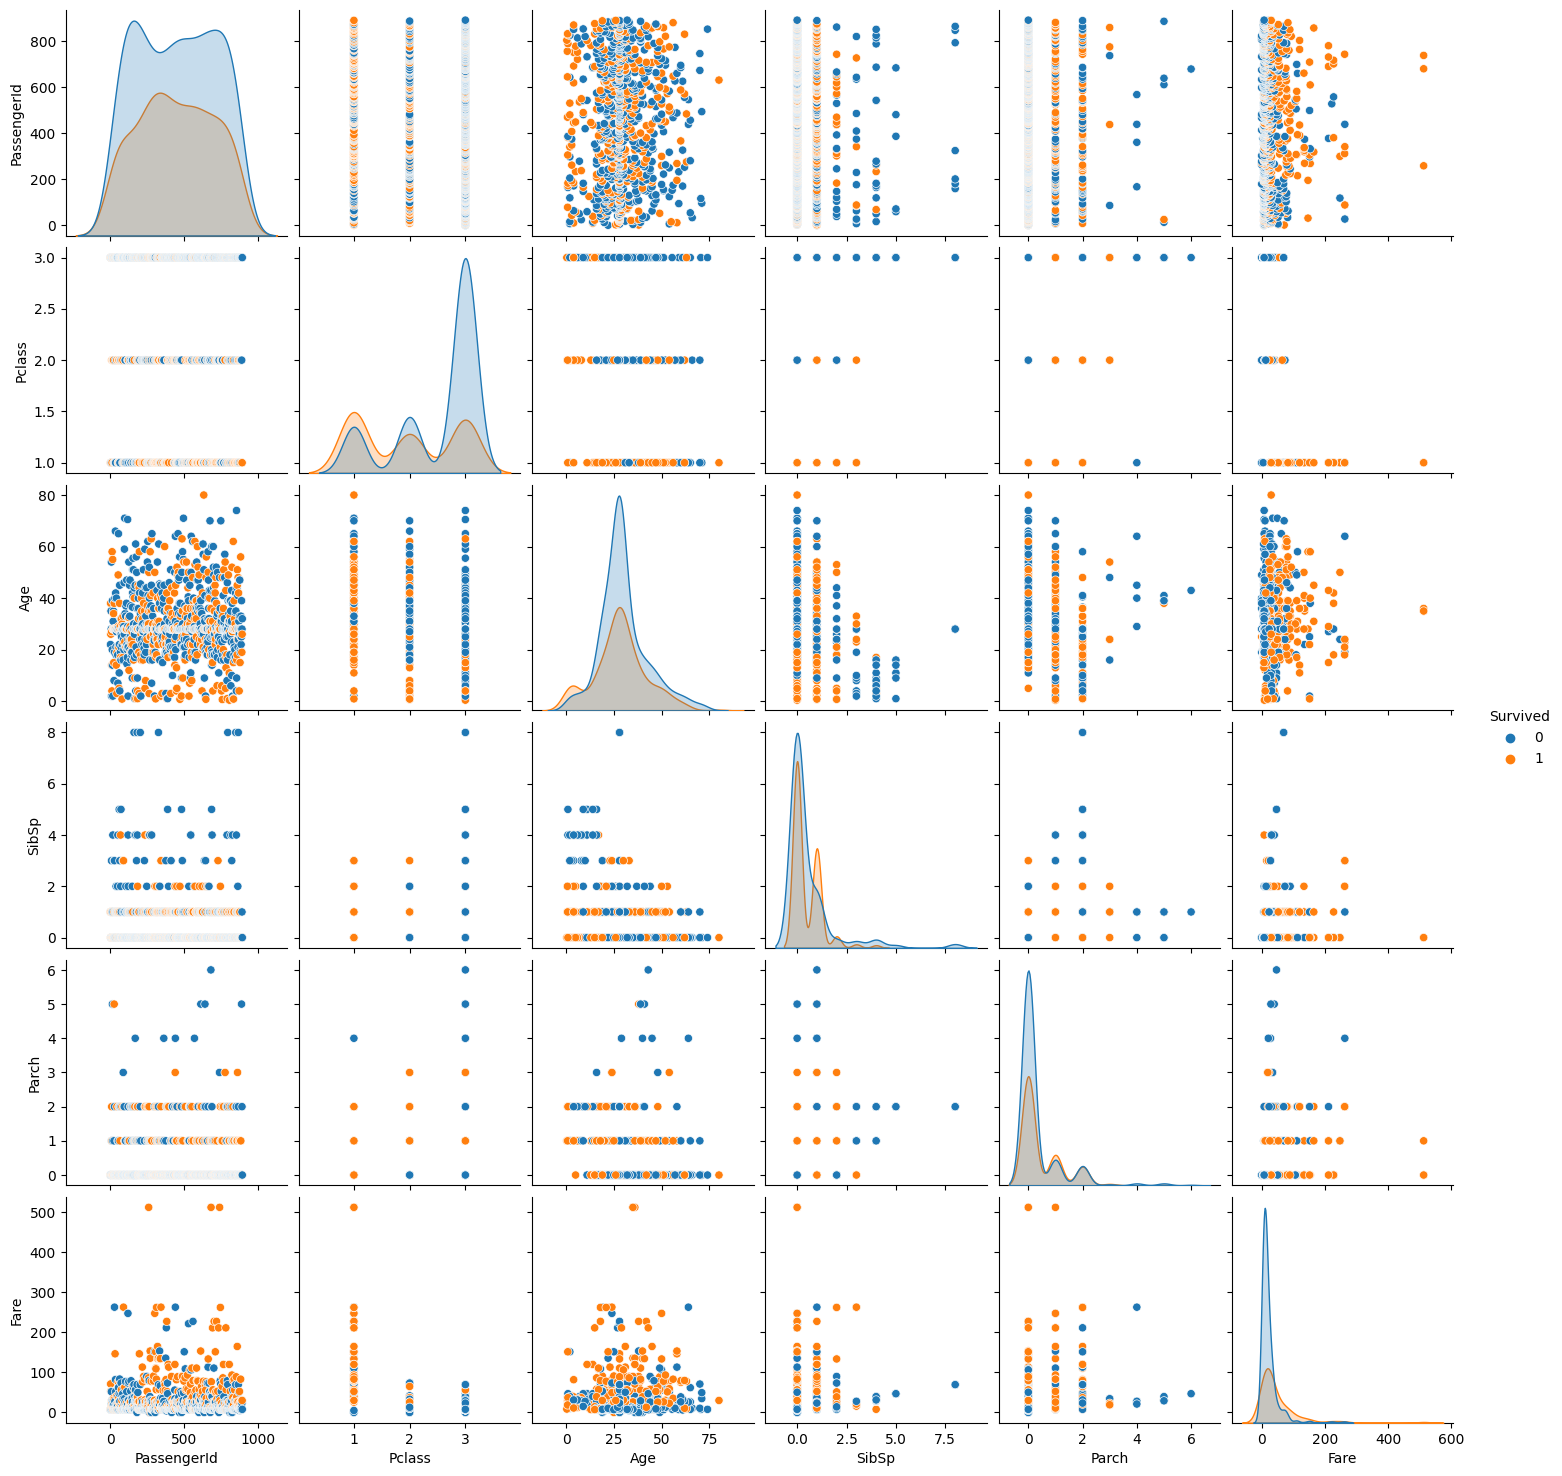

In [19]:
#pairplot against Survived 

sns.pairplot(train_df, hue = 'Survived')

Contingency table for Survived vs Pclass:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Contingency table in percentage for Survived vs Pclass:
Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253



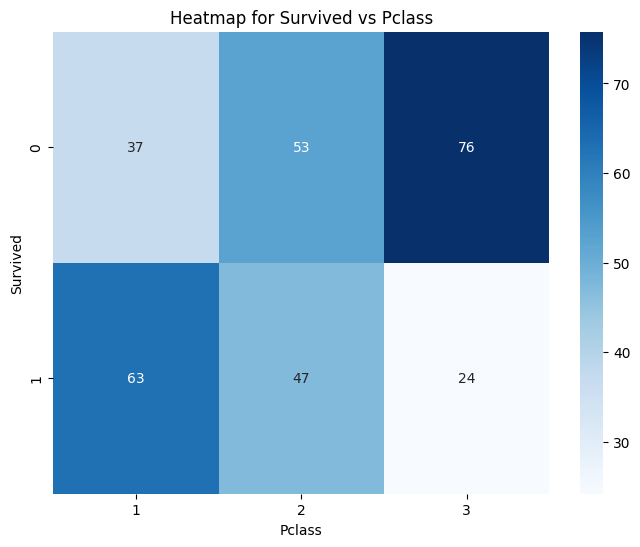


Contingency table for Survived vs Embarked:
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219

Contingency table in percentage for Survived vs Embarked:
Embarked          C          Q          S
Survived                                 
0         44.642857  61.038961  66.099071
1         55.357143  38.961039  33.900929



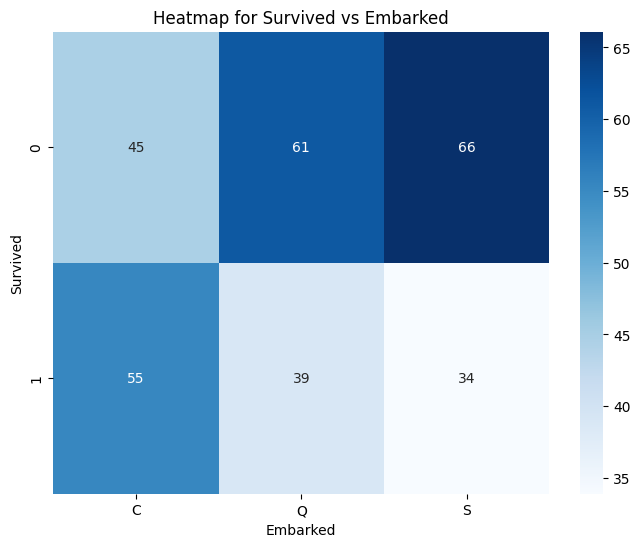


Contingency table for Survived vs Sex:
Sex       female  male
Survived              
0             81   468
1            233   109

Contingency table in percentage for Survived vs Sex:
Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815



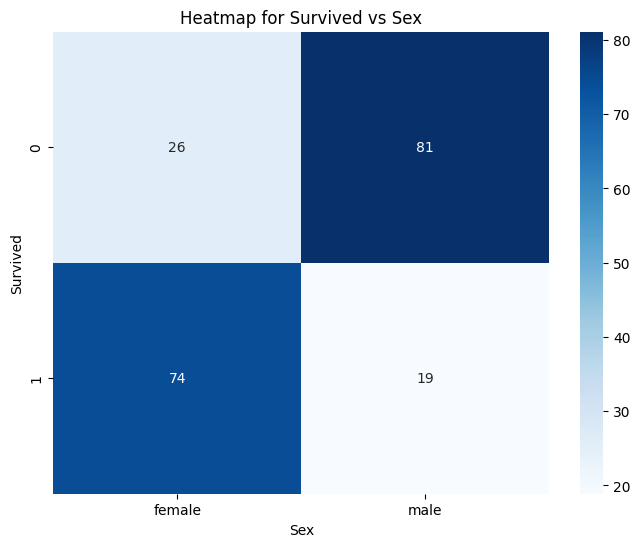

In [20]:
#contingency analysis against Survived feature 

def contingency_analysis(train_df, feature, other_features):
    
    for other_feature in other_features:
        print(f"Contingency table for {feature} vs {other_feature}:")
        print(pd.crosstab(train_df[feature], train_df[other_feature]))
        print()

        print(f"Contingency table in percentage for {feature} vs {other_feature}:")
        contingency_table_percentage = pd.crosstab(train_df[feature], train_df[other_feature], normalize="columns") * 100
        print(contingency_table_percentage)
        print()

        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table_percentage, annot=True, cmap="Blues")
        plt.title(f"Heatmap for {feature} vs {other_feature}")
        plt.xlabel(other_feature)
        plt.ylabel(feature)
        plt.show()
        print()

contingency_analysis(train_df, "Survived", ["Pclass", "Embarked", "Sex"])

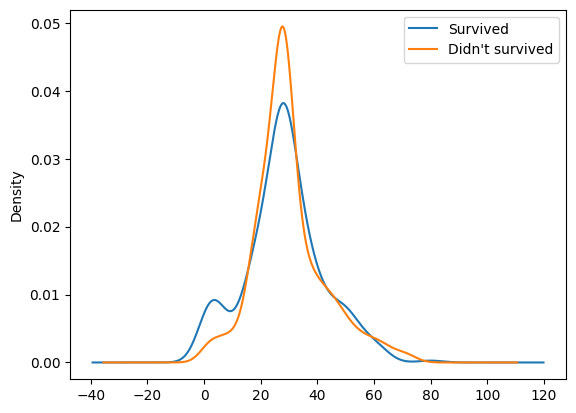

In [21]:
#kde for survival based on Age

train_df[train_df['Survived'] == 1]["Age"].plot(kind = 'kde', label = "Survived")   
train_df[train_df['Survived'] == 0]["Age"].plot(kind = 'kde', label = "Didn't survived")   
plt.legend()
plt.show()

In [22]:
#merging sibling & spouse (SibSp) with parent & child (Parch) feature by creating new feature (feature engieering) 
#creating new feature for single passengers 

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['Single'] = (train_df['FamilySize'] == 1).astype(int)
train_df = train_df.drop(columns=['SibSp', 'Parch'])

In [23]:
#perfroming OHE (One Hot Encoding)

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [24]:
#splitting data into train and validation

feature_columns = [col for col in train_df.columns if col != 'Survived']
X = train_df[feature_columns]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
#scaling the dataset 

scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_val_scaled = scaling.transform(X_val)

# MODEL SELECTION & MODEL DEPLOYMENT

In [26]:
#Logistic Regression

classifier1 = LogisticRegression()
parameters1 = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50], 'max_iter':[100, 200, 300, 700, 1000]}
model1 = GridSearchCV(classifier1, param_grid = parameters1, cv= 5)
model1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 700, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [27]:
print(model1.best_params_)
print(model1.best_score_)
print(model1.best_estimator_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8003921568627451
LogisticRegression(C=1)


In [28]:
y_pred = model1.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8135593220338984
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

Confusion Matrix:
[[154  21]
 [ 34  86]]


In [29]:
#over all this model is performing well so if anyone wants to try more linear models they can try

In [30]:
#Decision Tree Classifier 

tree_model1 = DecisionTreeClassifier()
parameter1={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}
model2 = GridSearchCV(tree_model1, param_grid = parameter1, cv = 10, scoring = 'accuracy')
model2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
print(model2.best_params_)
print(model2.best_score_)
print(model2.best_estimator_)

{'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.8087005649717514
DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')


In [32]:
y_pred = model2.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8033898305084746
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.82      0.66      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295

Confusion Matrix:
[[158  17]
 [ 41  79]]


In [33]:
# this mdel is performing better than logistic one we can try more 

In [34]:
#Random Forest Classifier

tree_model2 = RandomForestClassifier()
parameter2 = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [1, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

model3 = GridSearchCV(tree_model2, param_grid = parameter2, cv = 5, scoring = 'accuracy')
model3.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [1, 3, 10]},
             scoring='accuracy')

In [35]:
print(model3.best_params_)
print(model3.best_score_)
print(model3.best_estimator_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}
0.8188655462184873
RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=10,
                       min_samples_split=3)


In [36]:
y_pred = model3.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8271186440677966
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       175
           1       0.85      0.70      0.77       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.81       295
weighted avg       0.83      0.83      0.82       295

Confusion Matrix:
[[160  15]
 [ 36  84]]


In [37]:
# this model is performing more well than previous one

In [38]:
#XGBoost Classifier 

xgb1 = XGBClassifier()
parameter1 ={
    'eta' : [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 18, 1],
    'gamma': [1,9,3],
    'min_child_weight' : [0, 10, 1],
    'n_estimators': [180],
    'eval_metric' : ['rmse', 'mae', 'auc']

}
model4 = GridSearchCV(xgb1, param_grid = parameter1, cv = 5, scoring = 'accuracy')
model4.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.01, 0.1, 0.2, 0.3],
                         'eval_metric': ['rmse', 'mae', 'auc'],
                         'gamma': [1, 9, 3], 'max_depth': [3, 18, 1],
                         'min_child_weight': [0, 10, 1],
                         'n_estimators': [180]},
             scoring='accuracy')

In [39]:
print(model4.best_params_)
print(model4.best_score_)
print(model4.best_estimator_)

{'eta': 0.3, 'eval_metric': 'rmse', 'gamma': 1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 180}
0.8238515406162465
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='rmse',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)


In [40]:
y_pred = model4.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8169491525423729
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.86       175
           1       0.84      0.68      0.75       120

    accuracy                           0.82       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.82      0.82      0.81       295

Confusion Matrix:
[[160  15]
 [ 39  81]]


In [41]:
#this is performing better than the previous model

In [42]:
#Suport Vector Classifier 

svc1 = SVC()
parameter1 = {
     'C': [1, 10, 100, 1000], 'kernel': ['linear'],
     'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
}
model5 = GridSearchCV(svc1, param_grid = parameter1, cv = 5, scoring = 'accuracy')
model5.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [43]:
print(model5.best_params_)
print(model5.best_score_)
print(model5.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8054341736694678
SVC(C=1, gamma=0.1)


In [44]:
y_pred = model5.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8101694915254237
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       175
           1       0.86      0.64      0.73       120

    accuracy                           0.81       295
   macro avg       0.82      0.78      0.79       295
weighted avg       0.82      0.81      0.80       295

Confusion Matrix:
[[162  13]
 [ 43  77]]


In [45]:
#this model is okay okay 

***As we can see Random Forest and XGBoost Classifier is giving similar performance and better than other models***

In [46]:
#dropping features that isn't required
test_df = test_df.drop(columns=['Cabin', 'Name', 'Ticket'])

In [47]:
#merging features as we did previously 
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
test_df = test_df.drop(columns=['SibSp', 'Parch'])

In [48]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [49]:
missing_cols = set(feature_columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[feature_columns]

In [50]:
X_test_scaled = scaling.transform(test_df)

In [51]:
final_model = model4.best_estimator_

In [52]:
test_model = final_model.predict(X_test_scaled)

In [53]:
submission = pd.DataFrame({
    'PassengerId': test_df.index + 892, 
    'Survived': test_model
})

submission.to_csv('submission.csv', index=False)